In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding=('ISO-8859-1'))

In [3]:
df2=pd.read_excel(r'C:\Users\Dell\Downloads\Country-Code.xlsx')

In [4]:
pd.set_option('display.max_columns',None)

'''When you set the value to None, it means that there is no maximum limit on the number of columns displayed. 
This can be useful when you have DataFrames with a large number of columns and you want to display all of them without any 
truncation.'''

'When you set the value to None, it means that there is no maximum limit on the number of columns displayed. \nThis can be useful when you have DataFrames with a large number of columns and you want to display all of them without any \ntruncation.'

In [5]:
df.shape

(9551, 21)

In [6]:
df2.shape

(15, 2)

In [7]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [8]:
df2.head(15)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


The Zomato Data Analysis project aims to provide valuable insights for food enthusiasts, helping them discover the best cuisines within their budget across different regions. It also assists users in identifying value-for-money restaurants offering quality cuisines. Furthermore, the analysis highlights the top cuisines of each country and the localities within those countries with the highest number of restaurants serving those cuisines. Overall, this project seeks to enhance the dining experience by providing comprehensive information on cuisines, restaurants, and localities, catering to the diverse needs of food lovers worldwide.

#### Problem statement : In this dataset predict 2 things –
#### 1) Average Cost for two
#### 2) Price range


In [9]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [10]:
##First we merge both data sets
##
data = pd.merge(df,df2,on='Country Code')

In [11]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [12]:
data.shape

(9551, 22)

In [13]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [14]:
data.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### The dataset contains information about 9551 restaurants with 22 columns
##### There are 9 null values in the 'Cuisines' column.
##### There are 5 columns with integer data type.
##### There are 3 columns with float data type.
##### There are 10 columns with object data type

In [15]:
## First of all, we will find out the index of the null value and find its location.
nulls=np.where(data['Cuisines'].isnull()==True)
nulls

(array([ 84,  87,  94, 288, 312, 328, 349, 395, 432], dtype=int64),)

In [16]:
data.loc[nulls]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34,United States
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,36,United States
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160,United States
288,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209,United States
312,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102,United States
328,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,11,United States
349,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158,United States
395,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707,United States
432,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309,United States


In [17]:
### We will delete the NULL value because there are no cuisines so we cannot predict anything from it.
### and also it will not make much difference in the data set.
### i will delete null row wise
data = data.dropna()

In [18]:
data.isnull().sum().sum()

0

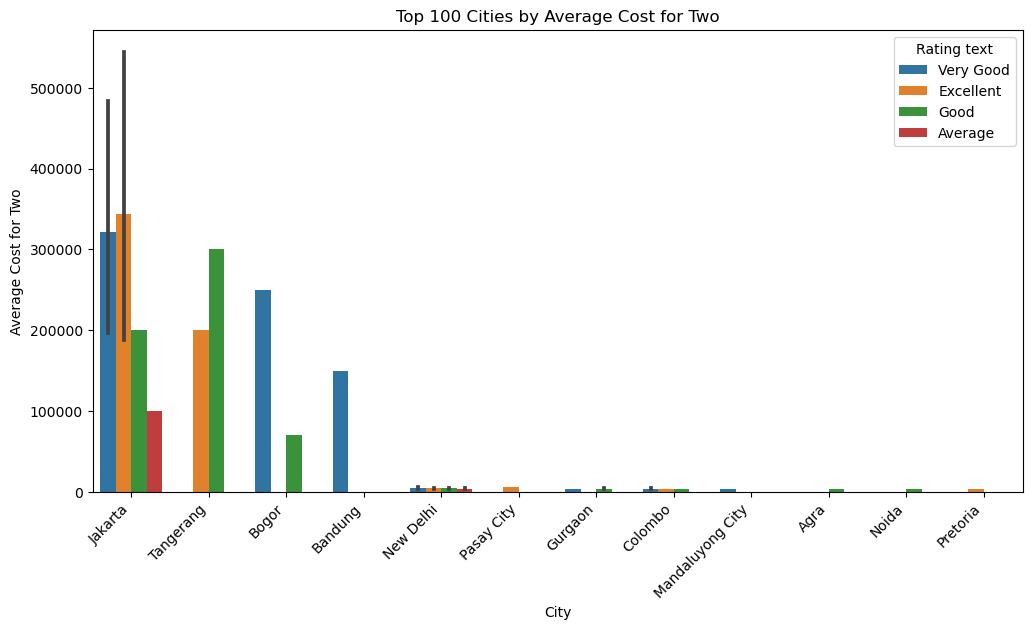

In [19]:
top_cities = data.sort_values(by='Average Cost for two', ascending=False).head(100)

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Average Cost for two', data=top_cities,hue='Rating text')
plt.xticks(rotation=45, ha='right')
plt.title('Top 100 Cities by Average Cost for Two')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.show()

In [20]:
data.Currency.unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [21]:
# Filter rows where currency is Botswana Pula(P)
botswana_pula_rows = data[data['Currency'] == 'Botswana Pula(P)']
botswana_pula_rows

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


In [22]:
# change Botswana Pula(P) in dollar

for index, row in data.iterrows():
    if row["Currency"] == "Botswana Pula(P)":
        data.at[index, "Average Cost for two"] *= 0.072
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [23]:
botswana_pula_rows = data[data['Currency'] == 'Botswana Pula(P)']
botswana_pula_rows

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",79.2,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,86.4,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",288.0,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",108.0,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",108.0,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,72.0,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",144.0,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",144.0,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",432.0,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,79.2,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


In [24]:
#### change Brazilian Real(R$) into dollar
for index, row in data.iterrows():
    if row["Currency"] == "Brazilian Real(R$)":
        data.at[index, "Average Cost for two"] *= 0.20018
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [25]:
data[data['Currency']=='Brazilian Real(R$)']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
22,6600681,Chez Michou,30,Brasí_lia,"SCLN, 208, Bloco A, Loja 30, Asa Norte, Brasí_lia",Asa Norte,"Asa Norte, Brasí_lia",-47.881789,-15.764142,"Fast Food, French",11.0099,Brazilian Real(R$),No,No,No,No,2,3.0,Orange,Average,6,Brazil
23,6601005,Cafí© Daniel Briand,30,Brasí_lia,"SCLN 104, Bloco A, Loja 26, Asa Norte, Brasí_lia",Asa Norte,"Asa Norte, Brasí_lia",-47.882667,-15.777500,Cafe,6.0054,Brazilian Real(R$),No,No,No,No,1,3.8,Yellow,Good,9,Brazil
24,6600292,Casa do Biscoito Mineiro,30,Brasí_lia,"SCLN 210, Bloco D, Loja 36/48, Asa Norte, Bras...",Asa Norte,"Asa Norte, Brasí_lia",-47.882136,-15.757472,Bakery,9.0081,Brazilian Real(R$),No,No,No,No,2,3.7,Yellow,Good,11,Brazil
25,6600441,Maori,30,Brasí_lia,"CLN 110, Bloco D, Loja 28, Asa Norte, Brasí_lia",Asa Norte,"Asa Norte, Brasí_lia",-47.888167,-15.758833,Brazilian,12.0108,Brazilian Real(R$),No,No,No,No,3,3.8,Yellow,Good,11,Brazil
26,6600970,Pizza íæ Bessa,30,Brasí_lia,"SCS 214, Bloco C, Loja 40, Asa Sul, Brasí_lia",Asa Sul,"Asa Sul, Brasí_lia",-47.915667,-15.831167,Pizza,10.0090,Brazilian Real(R$),No,No,No,No,2,3.2,Orange,Average,11,Brazil
27,6600379,Sushi Loko,30,Brasí_lia,"SCS 213, Bloco C, Loja 35, Asa Sul, Brasí_lia",Asa Sul,"Asa Sul, Brasí_lia",-47.915667,-15.831000,Japanese,16.0144,Brazilian Real(R$),No,No,No,No,3,3.1,Orange,Average,10,Brazil
28,6600214,Beirute,30,Brasí_lia,"CLS 109, Bloco A, Loja 2/6, Asa Sul, Brasí_lia",Asa Sul,"Asa Sul, Brasí_lia",-47.907500,-15.820000,Arabian,18.0162,Brazilian Real(R$),No,No,No,No,3,3.7,Yellow,Good,8,Brazil
29,6601218,New Koto,30,Brasí_lia,"SCS 212, Bloco B, Loja 26, Asa Sul, Brasí_lia",Asa Sul,"Asa Sul, Brasí_lia",-47.910167,-15.827333,Japanese,40.0360,Brazilian Real(R$),No,No,No,No,4,3.7,Yellow,Good,5,Brazil
30,6600060,Sandubas Cafí©,30,Brasí_lia,"Edifí_cio Josí© Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Brasí_lia",-47.890167,-15.797000,"Brazilian, Cafe",6.0054,Brazilian Real(R$),No,No,No,No,1,0.0,White,Not rated,2,Brazil
31,6600083,Villa Tevere,30,Brasí_lia,"CLS 115, Bloco A, Loja 2, Asa Sul, Brasí_lia",Asa Sul,"Asa Sul, Brasí_lia",-47.923667,-15.831333,Italian,30.0270,Brazilian Real(R$),No,No,No,No,4,4.1,Green,Very Good,12,Brazil


In [26]:
#### change Emirati Diram(AED) into dollar
for index, row in data.iterrows():
    if row["Currency"] == "Emirati Diram(AED)":
        data.at[index, "Average Cost for two"] *= 0.27
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [27]:
data['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [28]:
#### change Indian Rupees(Rs.) into dollar
for index, row in data.iterrows():
    if row["Currency"] == "Indian Rupees(Rs.)":
        data.at[index, "Average Cost for two"] *= 0.012
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [29]:
#### change Indonesian Rupiah(IDR) into dollar
for index, row in data.iterrows():
    if row["Currency"] == "Indonesian Rupiah(IDR)":
        data.at[index, "Average Cost for two"] *= 0.000064
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [30]:
#### change NewZealand($) into dollar
for index, row in data.iterrows():
    if row["Currency"] == "NewZealand($)":
        data.at[index, "Average Cost for two"] *= 0.616601
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [31]:
#### change Pounds(\x8c£) into dollar
for index, row in data.iterrows():
    if row["Currency"] == "Pounds(\x8c£)":
        data.at[index, "Average Cost for two"] *= 1.27
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [32]:
#### change Qatari Rial(QR) into dollar
for index, row in data.iterrows():
    if row["Currency"] == "Qatari Rial(QR)":
        data.at[index, "Average Cost for two"] *= 0.27
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [33]:
#### change Rand(R) into dollar
for index, row in data.iterrows():
    if row["Currency"] == "Rand(R)":
        data.at[index, "Average Cost for two"] *= 19.29
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [34]:
#### change Sri Lankan Rupee(LKR) into dollar
for index, row in data.iterrows():
    if row["Currency"] == "Sri Lankan Rupee(LKR)":
        data.at[index, "Average Cost for two"] *= 0.0032
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [35]:
#### Turkish Lira(TL) into dollar
for index, row in data.iterrows():
    if row["Currency"] == "Turkish Lira(TL)":
        data.at[index, "Average Cost for two"] *= 0.032
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [36]:
###Search Dollar country
botswana_pula_rows = data[data['Currency'] == 'Dollar($)']
botswana_pula_rows

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
82,17284404,Austin's BBQ and Oyster Bar,216,Albany,"2820 Meredyth Dr, Albany, GA 31707",Albany,"Albany, Albany",-84.221535,31.610387,"BBQ, Burger, Seafood",25.0,Dollar($),No,No,No,No,2,3.3,Orange,Average,35,United States
83,17284203,BJ's Country Buffet,216,Albany,"2401 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.207095,31.608743,"American, BBQ",10.0,Dollar($),No,No,No,No,1,3.3,Orange,Average,25,United States
85,17284302,El Vaquero Mexican Restaurant,216,Albany,"2700 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219400,31.615800,Mexican,0.0,Dollar($),No,No,No,No,1,3.4,Orange,Average,45,United States
86,17284397,Elements Coffee Co - Northwest,216,Albany,"2726 Ledo Rd Ste 10, Albany, GA 31707",Albany,"Albany, Albany",-84.206944,31.622412,"Coffee and Tea, Sandwich",10.0,Dollar($),No,No,No,No,1,3.4,Orange,Average,26,United States
88,17284094,Chick-fil-A,216,Albany,"2703 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219300,31.616000,Fast Food,10.0,Dollar($),No,No,No,No,1,3.5,Yellow,Good,67,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,18479742,I Am,184,Singapore,"674 North Bridge Road, #01-01 Haji Lane 188804","North Bridge Road, Rochor","North Bridge Road, Rochor, Singapore",103.858430,1.301707,"Western, Fusion, Fast Food",60.0,Dollar($),No,No,No,No,4,3.2,Orange,Average,32,Singapore
560,18482938,Super Loco,184,Singapore,The Quayside\r60 Roberston Quay #01-13 238252,"Robertson Quay, Singapore River","Robertson Quay, Singapore River, Singapore",103.839165,1.290084,"American, Mexican",95.0,Dollar($),No,No,No,No,4,3.2,Orange,Average,30,Singapore
561,18483082,Artistry,184,Singapore,17 Jalan Pinang 199149,"Sungai Pinang, Rochor","Sungai Pinang, Rochor, Singapore",103.858181,1.303035,"American, Bakery, European, Burger, Fusion",50.0,Dollar($),No,No,No,No,3,3.8,Yellow,Good,28,Singapore
562,18483446,Bitters & Love,184,Singapore,118 Telok Ayer Street 068587,"Telok Ayer Street, Outram","Telok Ayer Street, Outram, Singapore",103.848254,1.281970,Finger Food,40.0,Dollar($),No,No,No,No,3,3.9,Yellow,Good,35,Singapore


In [37]:
#### How many contry using dollar in data set
#### We need to change in Us dollar
botswana_pula_rows['Country'].unique()

array(['United States', 'Australia', 'Canada', 'Singapore'], dtype=object)

In [38]:
data[data['Country']=='Australia']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
516,16611114,Whitebull Hotel,14,Armidale,"117 Marsh St, Armidale, NSW",Armidale,"Armidale, Armidale",151.668879,-30.514717,"Bar Food, Steak",20.0,Dollar($),No,No,No,No,2,3.5,Yellow,Good,25,Australia
517,16608864,Taste of Balingup,14,Balingup,"63 South Western Hwy, Balingup, WA",Balingup,"Balingup, Balingup",115.984492,-33.784527,Modern Australian,20.0,Dollar($),No,No,No,No,2,3.2,Orange,Average,21,Australia
518,16604911,Bridge Road Brewers,14,Beechworth,"Old Coach House 50 Ford St, Beechworth, Beechw...",Beechworth,"Beechworth, Beechworth",146.685852,-36.360439,"Pizza, Bar Food",20.0,Dollar($),No,No,No,No,2,4.6,Dark Green,Excellent,237,Australia
519,16615894,The Giggling Goat,14,Dicky Beach,"14 Beerburrum St, Dicky Beach, QLD",Dicky Beach,"Dicky Beach, Dicky Beach",153.137401,-26.783576,"Coffee and Tea, Tea, Modern Australian",7.0,Dollar($),No,No,No,No,1,3.6,Yellow,Good,29,Australia
520,16612028,The Belle General,14,East Ballina,"12 Shelly Beach Rd, East Ballina, NSW",East Ballina,"East Ballina, East Ballina",153.593331,-28.862663,Cafe,20.0,Dollar($),No,No,No,No,2,4.1,Green,Very Good,56,Australia
521,16613507,Flaxton Gardens,14,Flaxton,"313 Flaxton Drive, Flaxton, QLD",Flaxton,"Flaxton, Flaxton",152.877147,-26.652133,"Tea, Modern Australian",30.0,Dollar($),No,No,No,No,3,3.5,Yellow,Good,37,Australia
522,16607969,Bespoke Harvest,14,Forrest,"16 Grant St, Forrest, VIC",Forrest,"Forrest, Forrest",143.714315,-38.517292,"Cafe, Australian",20.0,Dollar($),No,No,No,No,2,3.7,Yellow,Good,29,Australia
523,16604358,Blue Bean Love Cafe,14,Hepburn Springs,"115 Main Rd, Hepburn Springs, Hepburn Springs,...",Hepburn Springs,"Hepburn Springs, Hepburn Springs",144.138701,-37.312327,"Cafe, Coffee and Tea, Modern Australian",20.0,Dollar($),No,No,No,No,2,3.8,Yellow,Good,192,Australia
524,16604896,La Trattoria of Lavandula,14,Hepburn Springs,"350 Hepburn-Newstead Road, Hepburn Springs, VIC",Hepburn Springs,"Hepburn Springs, Hepburn Springs",144.110062,-37.275494,"Italian, Fusion, Cafe",7.0,Dollar($),No,No,No,No,1,3.8,Yellow,Good,93,Australia
525,16612550,5 Little Pigs,14,Huskisson,"64 Owen St, Huskisson, NSW",Huskisson,"Huskisson, Huskisson",150.671074,-35.038870,"Breakfast, Modern Australian",20.0,Dollar($),No,No,No,No,2,4.1,Green,Very Good,40,Australia


In [39]:
### change Australia dollar into us Australia
for index, row in data.iterrows():
    if row["Country"] == "Australia":
        data.at[index, "Average Cost for two"] *= 0.66
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [40]:
data[data['Country']=='Australia']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
516,16611114,Whitebull Hotel,14,Armidale,"117 Marsh St, Armidale, NSW",Armidale,"Armidale, Armidale",151.668879,-30.514717,"Bar Food, Steak",13.20,Dollar($),No,No,No,No,2,3.5,Yellow,Good,25,Australia
517,16608864,Taste of Balingup,14,Balingup,"63 South Western Hwy, Balingup, WA",Balingup,"Balingup, Balingup",115.984492,-33.784527,Modern Australian,13.20,Dollar($),No,No,No,No,2,3.2,Orange,Average,21,Australia
518,16604911,Bridge Road Brewers,14,Beechworth,"Old Coach House 50 Ford St, Beechworth, Beechw...",Beechworth,"Beechworth, Beechworth",146.685852,-36.360439,"Pizza, Bar Food",13.20,Dollar($),No,No,No,No,2,4.6,Dark Green,Excellent,237,Australia
519,16615894,The Giggling Goat,14,Dicky Beach,"14 Beerburrum St, Dicky Beach, QLD",Dicky Beach,"Dicky Beach, Dicky Beach",153.137401,-26.783576,"Coffee and Tea, Tea, Modern Australian",4.62,Dollar($),No,No,No,No,1,3.6,Yellow,Good,29,Australia
520,16612028,The Belle General,14,East Ballina,"12 Shelly Beach Rd, East Ballina, NSW",East Ballina,"East Ballina, East Ballina",153.593331,-28.862663,Cafe,13.20,Dollar($),No,No,No,No,2,4.1,Green,Very Good,56,Australia
521,16613507,Flaxton Gardens,14,Flaxton,"313 Flaxton Drive, Flaxton, QLD",Flaxton,"Flaxton, Flaxton",152.877147,-26.652133,"Tea, Modern Australian",19.80,Dollar($),No,No,No,No,3,3.5,Yellow,Good,37,Australia
522,16607969,Bespoke Harvest,14,Forrest,"16 Grant St, Forrest, VIC",Forrest,"Forrest, Forrest",143.714315,-38.517292,"Cafe, Australian",13.20,Dollar($),No,No,No,No,2,3.7,Yellow,Good,29,Australia
523,16604358,Blue Bean Love Cafe,14,Hepburn Springs,"115 Main Rd, Hepburn Springs, Hepburn Springs,...",Hepburn Springs,"Hepburn Springs, Hepburn Springs",144.138701,-37.312327,"Cafe, Coffee and Tea, Modern Australian",13.20,Dollar($),No,No,No,No,2,3.8,Yellow,Good,192,Australia
524,16604896,La Trattoria of Lavandula,14,Hepburn Springs,"350 Hepburn-Newstead Road, Hepburn Springs, VIC",Hepburn Springs,"Hepburn Springs, Hepburn Springs",144.110062,-37.275494,"Italian, Fusion, Cafe",4.62,Dollar($),No,No,No,No,1,3.8,Yellow,Good,93,Australia
525,16612550,5 Little Pigs,14,Huskisson,"64 Owen St, Huskisson, NSW",Huskisson,"Huskisson, Huskisson",150.671074,-35.038870,"Breakfast, Modern Australian",13.20,Dollar($),No,No,No,No,2,4.1,Green,Very Good,40,Australia


In [41]:
### change Canada dollar into us Australia
for index, row in data.iterrows():
    if row["Country"] == "Canada":
        data.at[index, "Average Cost for two"] *= 0.74
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

In [42]:
### change Singapore dollar into us Australia
for index, row in data.iterrows():
    if row["Country"] == "Singapore":
        data.at[index, "Average Cost for two"] *= 0.74
# Print updated DataFrame without changing index
print(data.head().to_string(index=True))

   Restaurant ID         Restaurant Name  Country Code              City                                                                  Address                                    Locality                                              Locality Verbose   Longitude   Latitude                          Cuisines  Average Cost for two          Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes      Country
0        6317637        Le Petit Souffle           162       Makati City  Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City   Century City Mall, Poblacion, Makati City        Century City Mall, Poblacion, Makati City, Makati City  121.027535  14.565443        French, Japanese, Desserts                  79.2  Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314  Phillipi

#### Now the Average cost for two is in Dollar currency

In [43]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",79.2,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,86.4,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


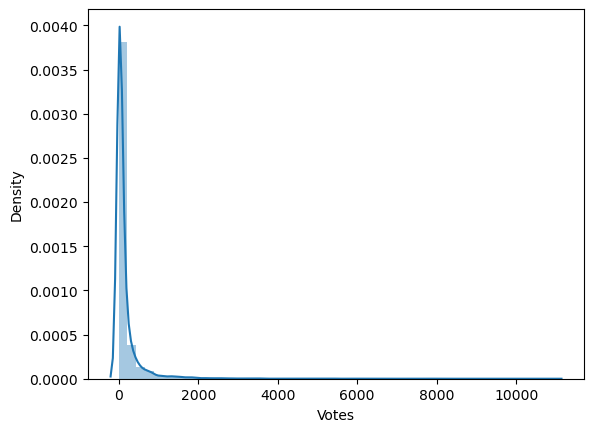

In [44]:
sns.distplot(data['Votes'])
plt.show()

#### It means most of the votes lies between 0 to 2000

In [45]:
#### average number of count of Votes
### This means the average count of all the votes given to all the restaurants.
### we get mean of the vote counts
voting = data.groupby('Restaurant Name')[['Votes']].mean()
voting

,Votes
Restaurant Name,
Let's Burrrp,0.0
#45,209.0
#Dilliwaala6,124.0
#InstaFreeze,2.0
#OFF Campus,216.0
...,...
t Lounge by Dilmah,34.0
tashas,374.0
wagamama,131.0


In [46]:
####  higest votes Restaurant

In [47]:
## top Restaurant who get the most number of voting
high_vot = voting[voting['Votes']>4000]

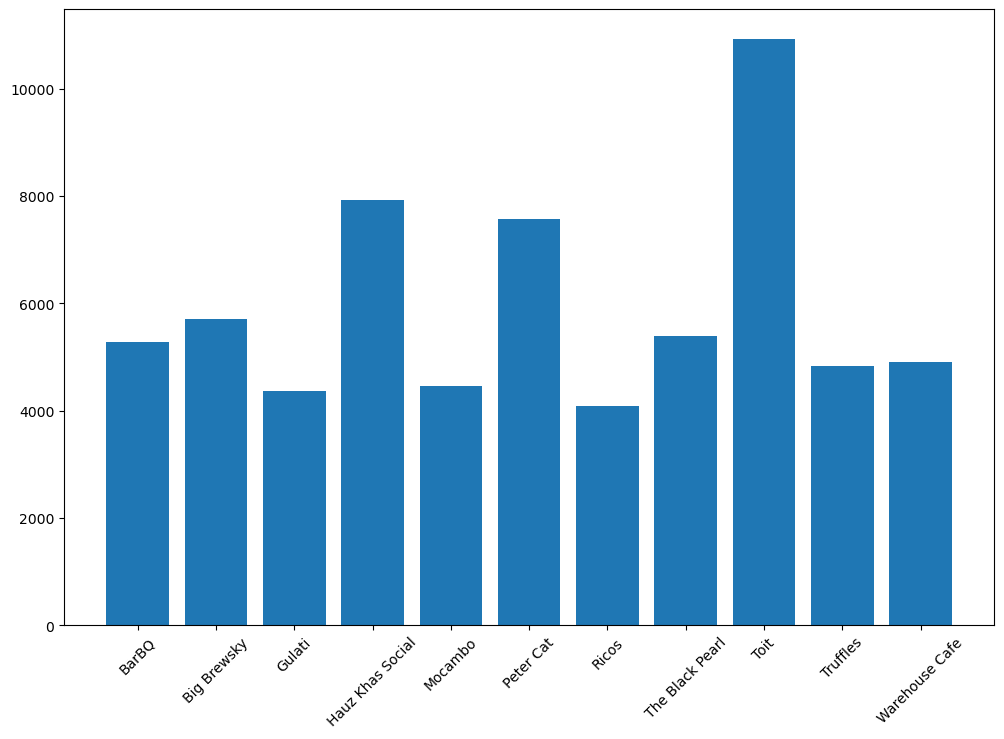

In [48]:
plt.figure(figsize=(12,8))
plt.bar(high_vot.index,high_vot['Votes'])
plt.xticks(rotation=45)
plt.show()

#### These 11 restaurants got the highest votings

In [49]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",79.2,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,86.4,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [50]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

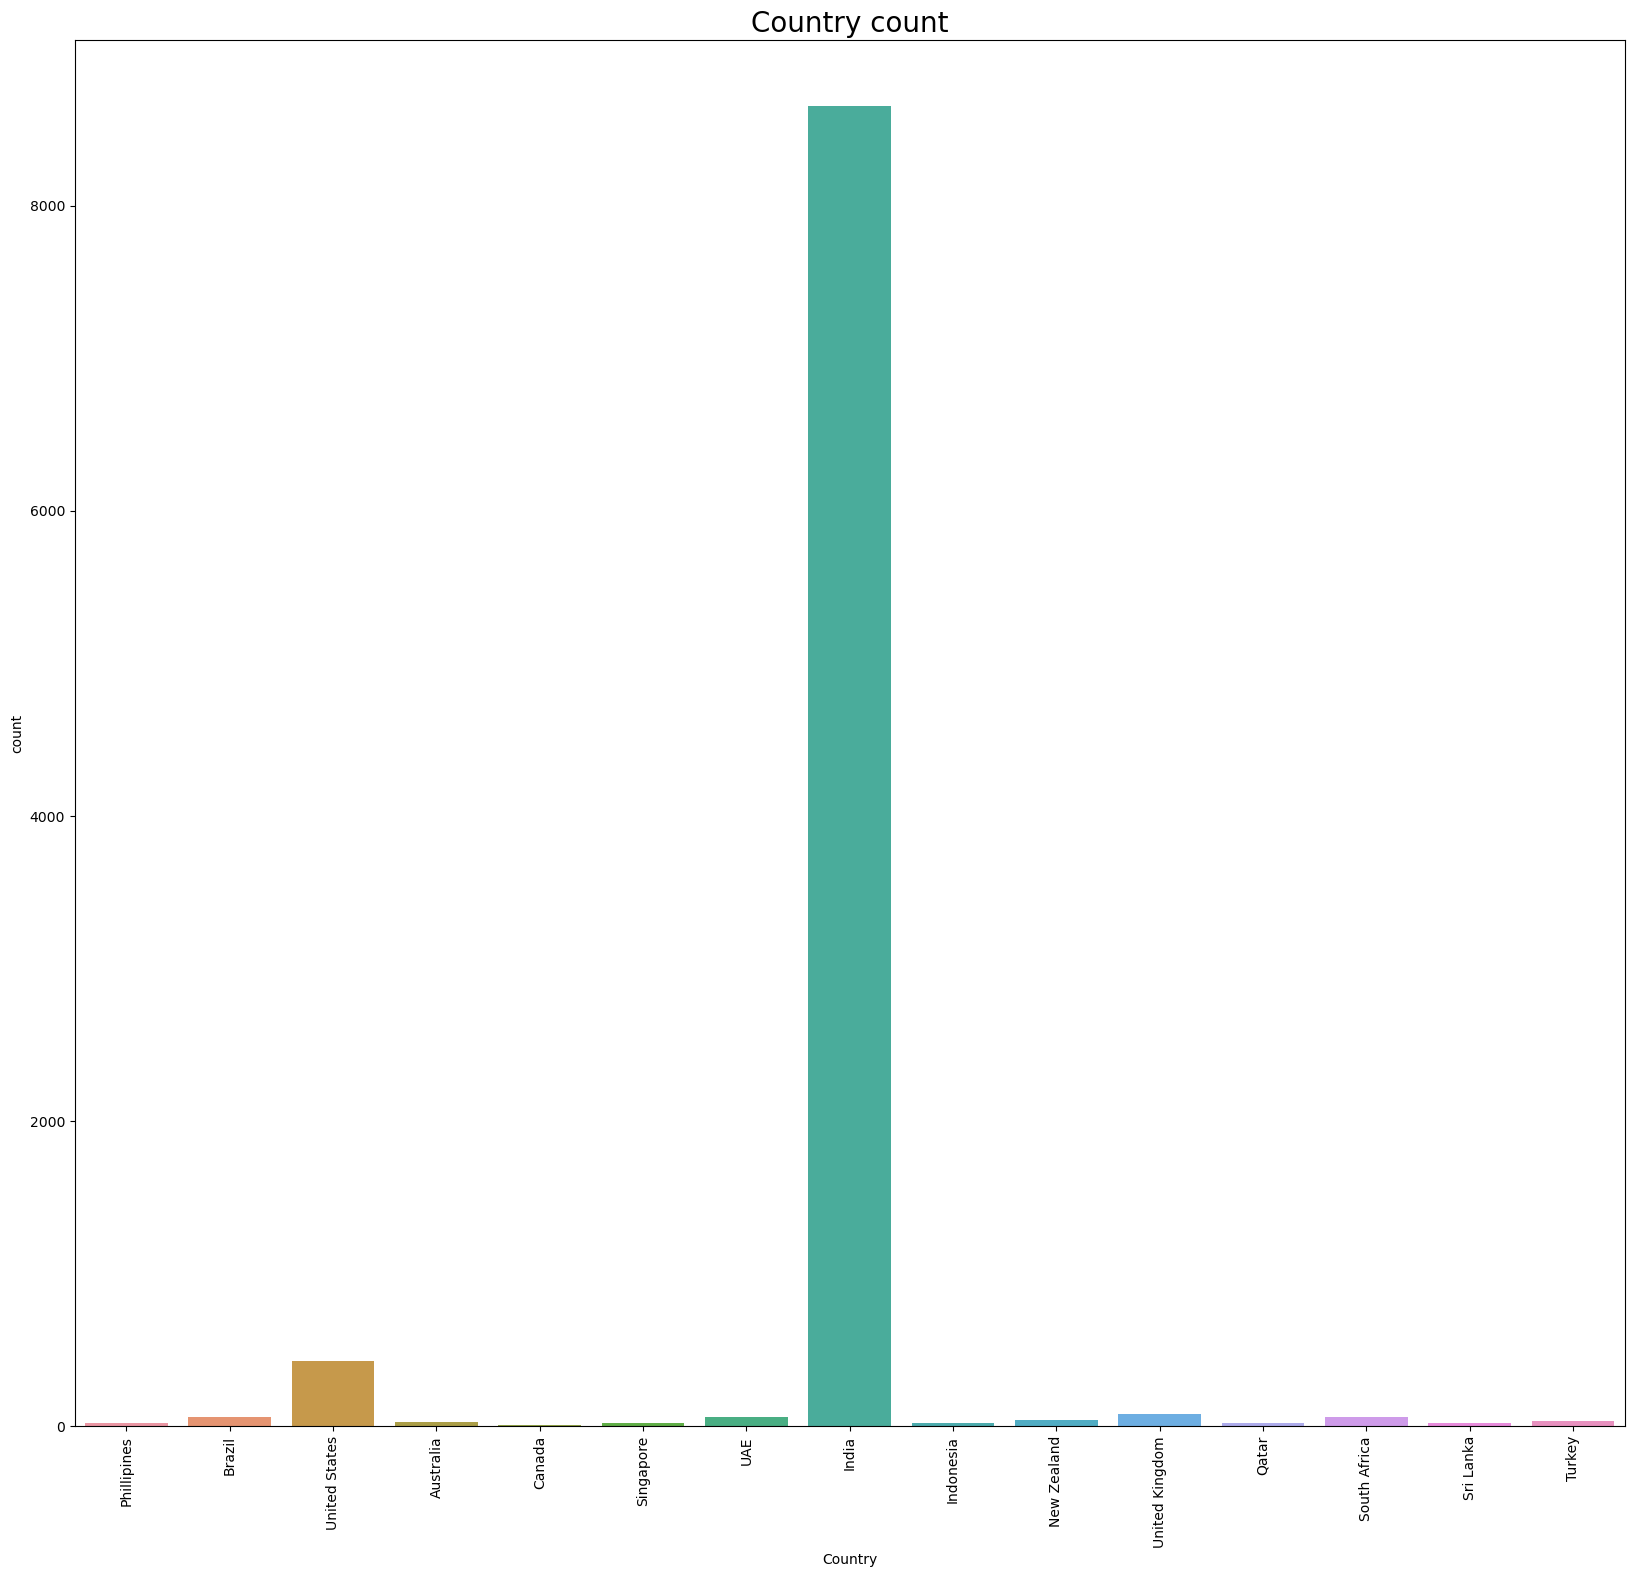

In [51]:
##### country which have Higest number or restaurants
plt.figure(figsize=(20,18))
sns.countplot(data['Country'])
plt.xticks(rotation = 90)
plt.title('Country count',fontsize=20)
plt.show

#### India hase higest no of restaurants approx 9000

In [52]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",79.2,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,86.4,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


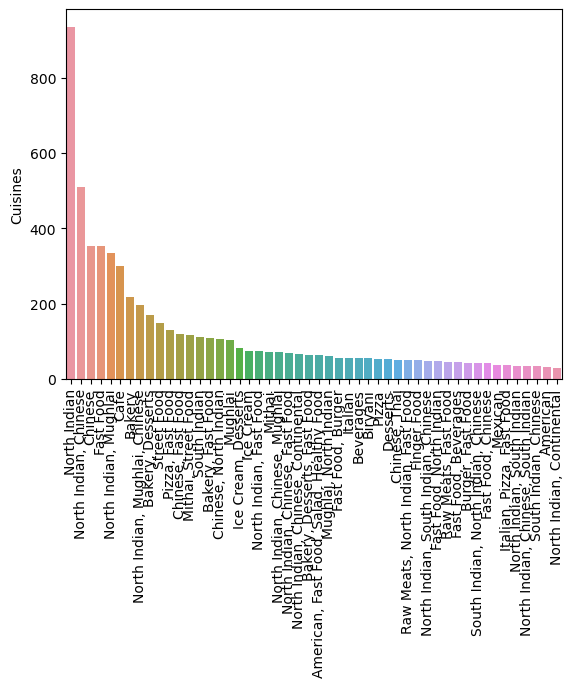

In [53]:
#### top cuisines
cuis = data['Cuisines'].value_counts()[0:50]
sns.barplot(x=cuis.index,y=cuis)
plt.xticks(rotation=90)
plt.show()

In [54]:
cuis

North Indian                                936
North Indian, Chinese                       511
Chinese                                     354
Fast Food                                   354
North Indian, Mughlai                       334
Cafe                                        299
Bakery                                      218
North Indian, Mughlai, Chinese              197
Bakery, Desserts                            170
Street Food                                 149
Pizza, Fast Food                            131
Chinese, Fast Food                          118
Mithai, Street Food                         116
South Indian                                112
Bakery, Fast Food                           108
Chinese, North Indian                       105
Mughlai                                     103
Ice Cream, Desserts                          83
Ice Cream                                    74
North Indian, Fast Food                      74
Mithai                                  

#### Which means top Cuisines is North Indians , North Indian, Chinese and so own 

In [55]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [56]:
### First of all we will delete those columns which are not of use to us.
data = data.drop(['Address','Restaurant Name','Restaurant ID',
                  'Locality Verbose','Locality Verbose','Switch to order menu','Longitude',
                  'Latitude','Country Code','Currency','Country'],axis=1)

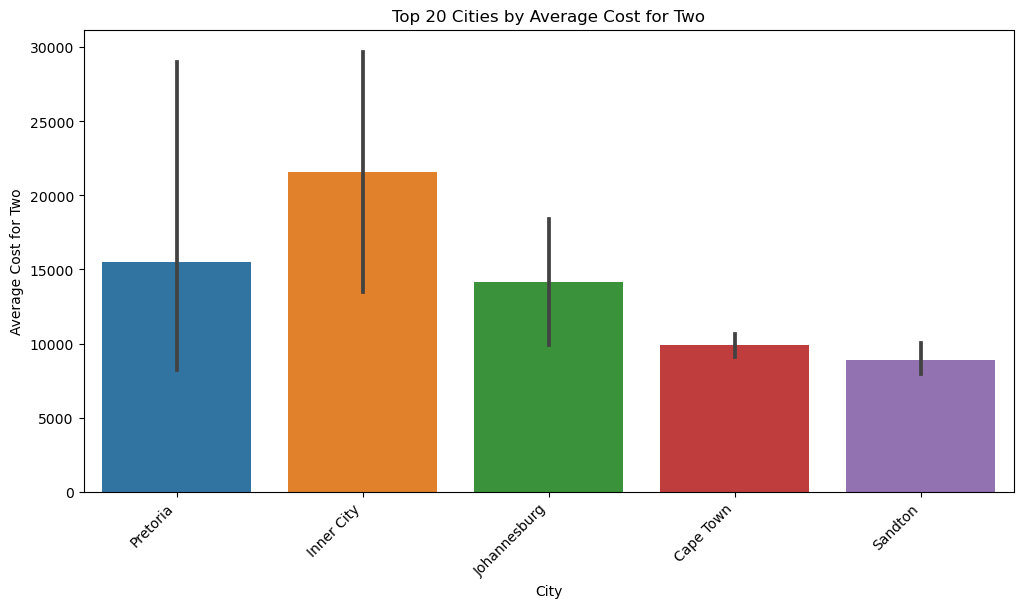

In [57]:
top_cities = data.sort_values(by='Average Cost for two', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Average Cost for two', data=top_cities)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Cities by Average Cost for Two')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.show()


### These citys take highest average cost for two

In [58]:
for column in data.columns:
    unique_count = data[column].nunique()
    print("Column:", column,'====', unique_count)

Column: City ==== 140
Column: Locality ==== 1206
Column: Cuisines ==== 1825
Column: Average Cost for two ==== 265
Column: Has Table booking ==== 2
Column: Has Online delivery ==== 2
Column: Is delivering now ==== 2
Column: Price range ==== 4
Column: Aggregate rating ==== 33
Column: Rating color ==== 6
Column: Rating text ==== 6
Column: Votes ==== 1012


In [59]:
data.dtypes

City                     object
Locality                 object
Cuisines                 object
Average Cost for two    float64
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

### There are many columns in it which have object data type

In [60]:
## encod columns
from sklearn.preprocessing import OrdinalEncoder
enc_columns = ['City','Locality','Cuisines','Has Table booking','Has Online delivery',
               'Is delivering now','Rating color','Rating text']
encoder = OrdinalEncoder()

for column in enc_columns:
    data[column] = encoder.fit_transform(data[[column]])


In [61]:
data.dtypes

City                    float64
Locality                float64
Cuisines                float64
Average Cost for two    float64
Has Table booking       float64
Has Online delivery     float64
Is delivering now       float64
Price range               int64
Aggregate rating        float64
Rating color            float64
Rating text             float64
Votes                     int64
dtype: object

In [62]:
data.head()

,City,Locality,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,73.0,171.0,920.0,79.2,1.0,0.0,0.0,3,4.8,0.0,1.0,314
1,73.0,592.0,1111.0,86.4,1.0,0.0,0.0,3,4.5,0.0,1.0,591
2,75.0,308.0,1671.0,288.0,1.0,0.0,0.0,4,4.4,1.0,5.0,270
3,75.0,860.0,1126.0,108.0,0.0,0.0,0.0,4,4.9,0.0,1.0,365
4,75.0,860.0,1122.0,108.0,1.0,0.0,0.0,4,4.8,0.0,1.0,229


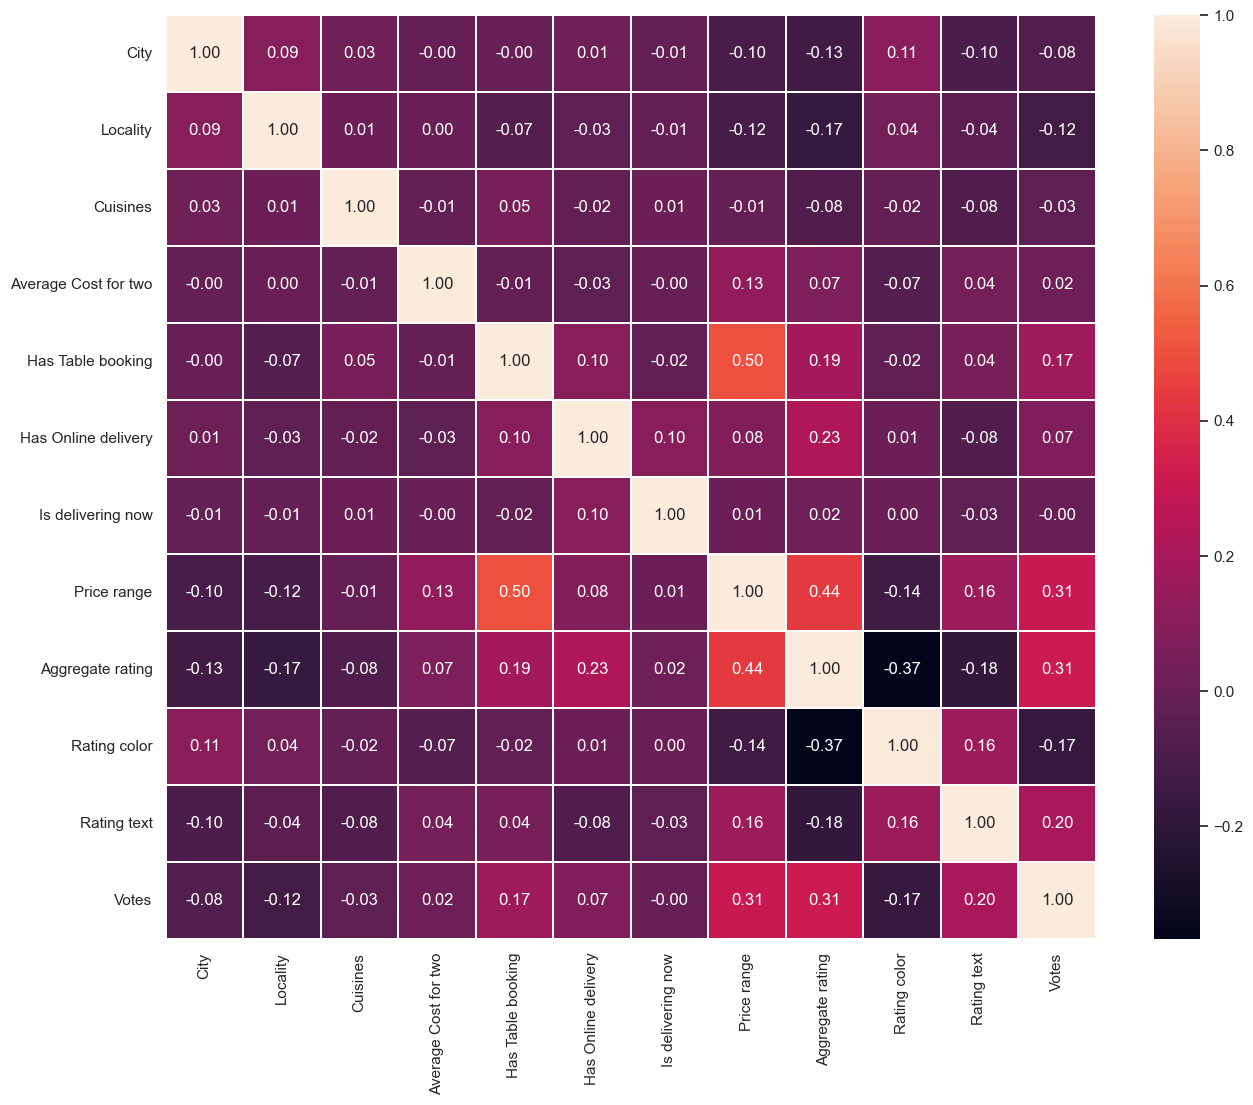

In [63]:
plt.figure(figsize = (15,12))
sns.set(font_scale = 1)
sns.heatmap(data.corr(),linewidths=0.2, fmt=".2f", annot = True)
plt.show()

#### there is no multicollinearity

## For Price range

In [64]:
data_copy = data.copy(deep = True)

In [65]:
data_copy = data_copy.drop(['Is delivering now','Cuisines'],axis=1)

In [66]:
data_copy.shape

(9542, 10)

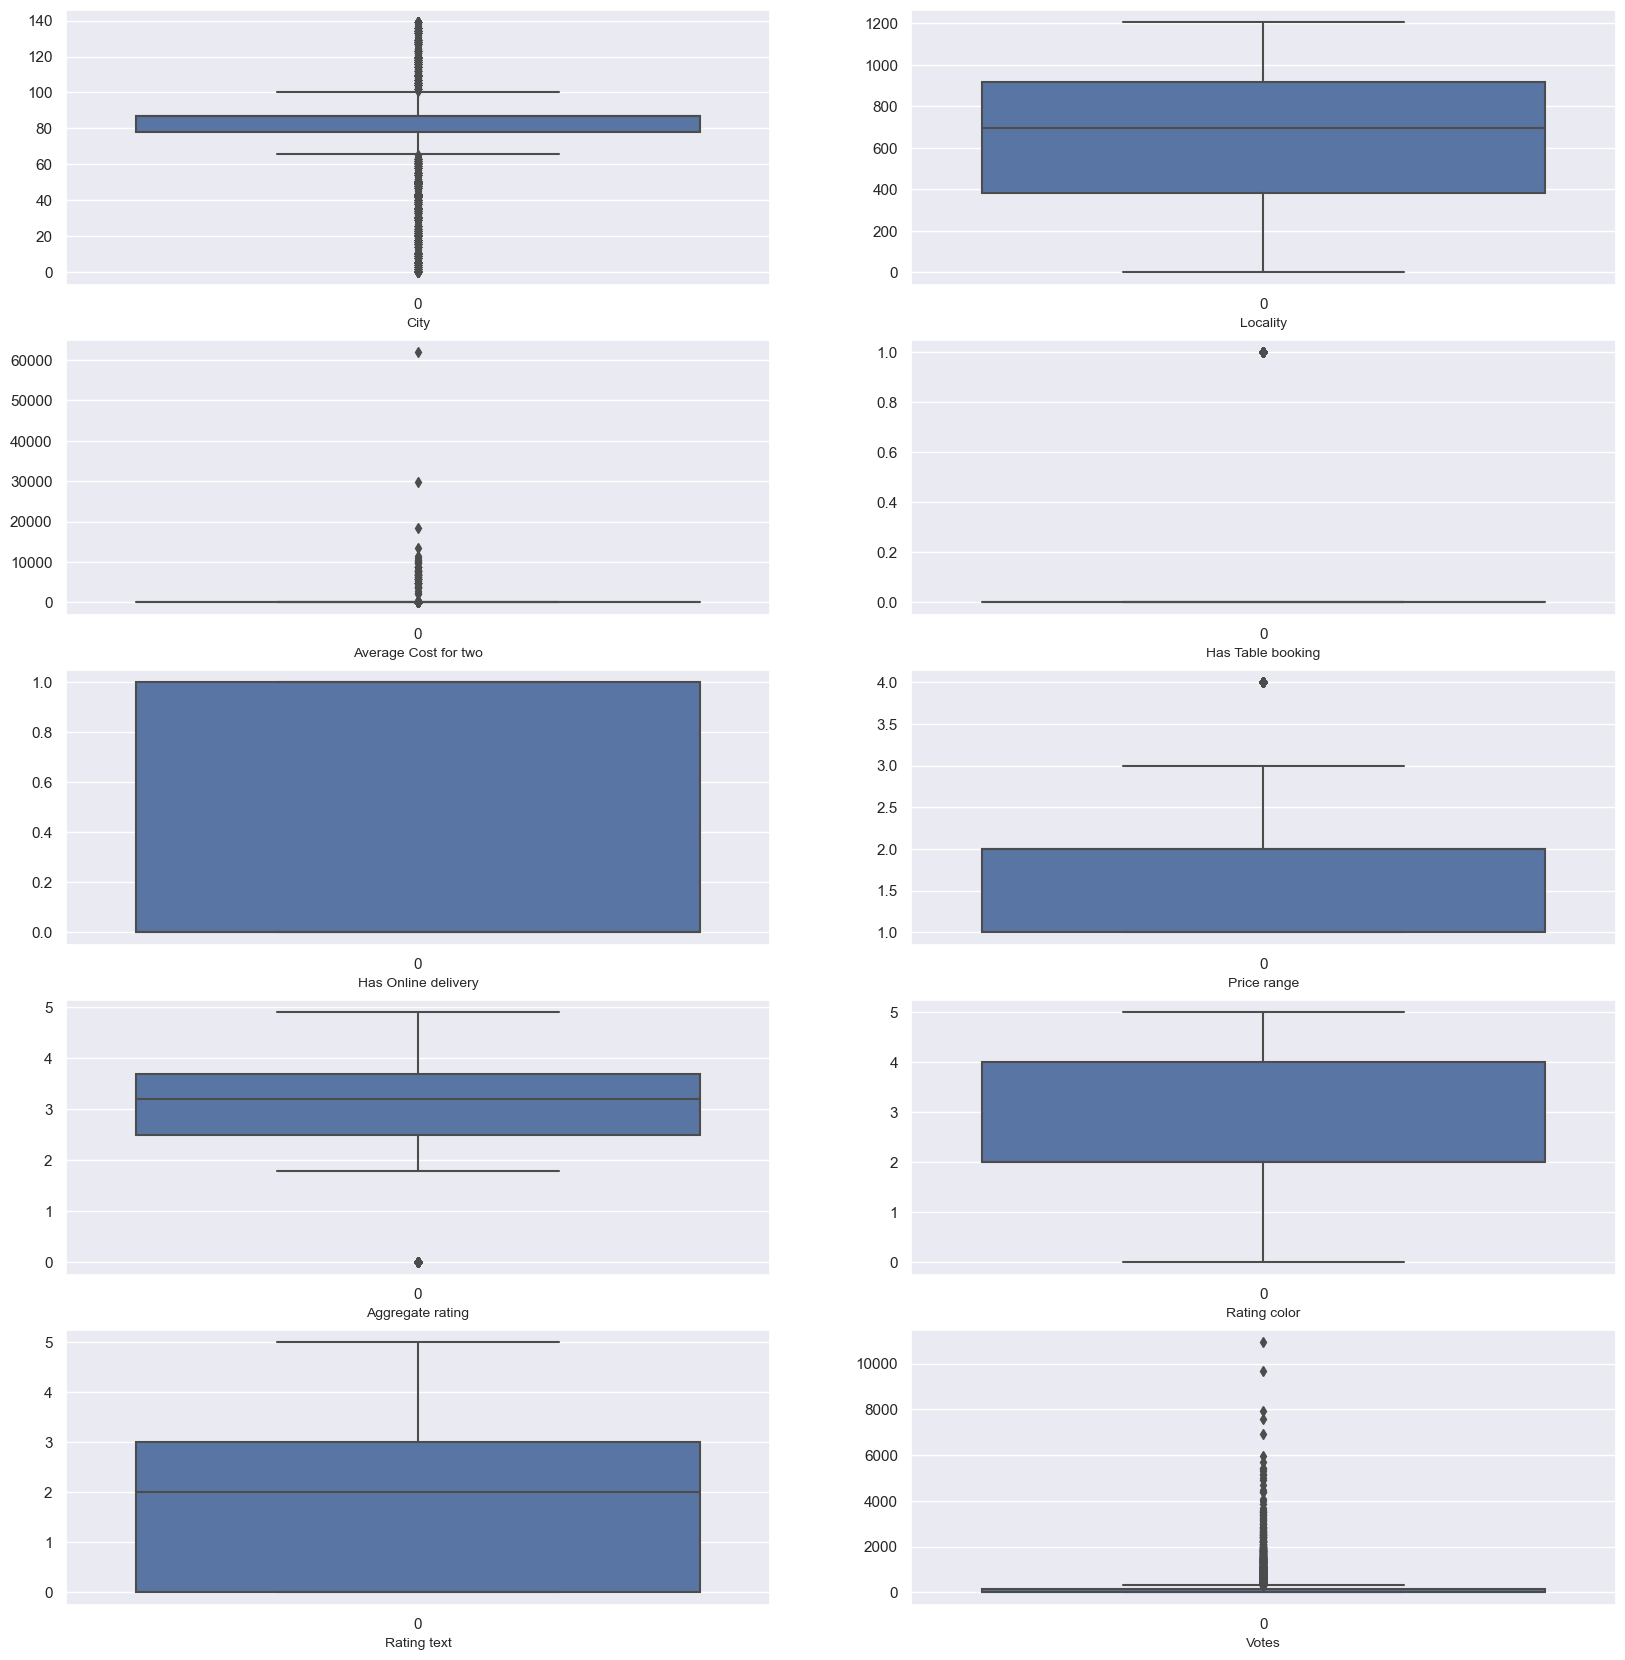

In [67]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data_copy.columns:
    if graph <= 12:
        plt.subplot(6, 2, graph)
        ax = sns.boxplot(data=data_copy[column])  
        plt.xlabel(column, fontsize=10)
    graph += 1



plt.show()

In [68]:
for column in data_copy.columns:
    unique_count = data_copy[column].nunique()
    print("Column:", column,'====', unique_count)

Column: City ==== 140
Column: Locality ==== 1206
Column: Average Cost for two ==== 265
Column: Has Table booking ==== 2
Column: Has Online delivery ==== 2
Column: Price range ==== 4
Column: Aggregate rating ==== 33
Column: Rating color ==== 6
Column: Rating text ==== 6
Column: Votes ==== 1012


#### there is lot of outlier in votes so i will remove it 
#### all other is categorical

In [69]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1

In [70]:
#### higher side outlier
v_high = (q3['Votes'] + (1.5* iqr['Votes']))
print(v_high)

v_index= np.where(data_copy['Votes']> v_high) 
print (v_index)

data_copy = data_copy.drop(data_copy.index[v_index])
print (data_copy.shape ) 

data_copy.reset_index()

317.5
(array([   1,    3,    5, ..., 9539, 9540, 9541], dtype=int64),)
(8411, 10)


,index,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,73.0,171.0,79.20,1.0,0.0,3,4.8,0.0,1.0,314
1,2,75.0,308.0,288.00,1.0,0.0,4,4.4,1.0,5.0,270
2,4,75.0,860.0,108.00,1.0,0.0,4,4.8,0.0,1.0,229
3,12,106.0,1109.0,57.60,0.0,0.0,3,4.8,0.0,1.0,294
4,14,111.0,591.0,50.40,0.0,0.0,3,4.3,1.0,5.0,223
...,...,...,...,...,...,...,...,...,...,...,...
8406,9532,6.0,555.0,3.20,0.0,0.0,3,4.2,1.0,5.0,103
8407,9533,6.0,617.0,1.60,0.0,0.0,2,4.3,1.0,5.0,103
8408,9534,6.0,637.0,2.24,0.0,0.0,3,4.4,1.0,5.0,131
8409,9535,6.0,1205.0,2.24,0.0,0.0,3,4.2,1.0,5.0,152


In [71]:
#### higher side outlier
a_high = (q3['Average Cost for two'] + (1.5* iqr['Average Cost for two']))
print(a_high)

a_index= np.where(data_copy['Average Cost for two']> a_high) 
print (a_index)

data_copy = data_copy.drop(data_copy.index[a_index])
print (data_copy.shape ) 

data_copy.reset_index()

19.6
(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,   16,   18,
         19,   21,   22,   23,   24,   25,   26,   27,   29,   30,   33,
         35,   37,   38,   40,   41,   42,   44,   46,   49,   50,   52,
         53,   54,   57,   58,   59,   60,   61,   62,   63,   66,   68,
         69,   75,   76,   77,   79,   80,   81,   82,   83,   87,   88,
         89,   90,   92,   95,   97,   99,  100,  101,  102,  103,  104,
        106,  108,  109,  111,  112,  113,  115,  116,  117,  118,  119,
        120,  122,  125,  126,  128,  132,  134,  140,  141,  142,  144,
        145,  147,  148,  149,  151,  152,  154,  155,  156,  157,  158,
        159,  162,  163,  165,  167,  168,  169,  172,  173,  174,  175,
        178,  179,  180,  182,  183,  185,  187,  190,  191,  192,  194,
        196,  198,  201,  202,  203,  204,  205,  208,  209,  212,  213,
        215,  217,  218,  219,  221,  224,  225,  229,  231,  232,  234,
        235,  236,  237,  238,  239,  240,  2

,index,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,22,21.0,67.0,11.0099,0.0,0.0,2,3.0,2.0,0.0,6
1,23,21.0,67.0,6.0054,0.0,0.0,1,3.8,5.0,2.0,9
2,24,21.0,67.0,9.0081,0.0,0.0,2,3.7,5.0,2.0,11
3,25,21.0,67.0,12.0108,0.0,0.0,3,3.8,5.0,2.0,11
4,26,21.0,68.0,10.0090,0.0,0.0,2,3.2,2.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...
7733,9532,6.0,555.0,3.2000,0.0,0.0,3,4.2,1.0,5.0,103
7734,9533,6.0,617.0,1.6000,0.0,0.0,2,4.3,1.0,5.0,103
7735,9534,6.0,637.0,2.2400,0.0,0.0,3,4.4,1.0,5.0,131
7736,9535,6.0,1205.0,2.2400,0.0,0.0,3,4.2,1.0,5.0,152


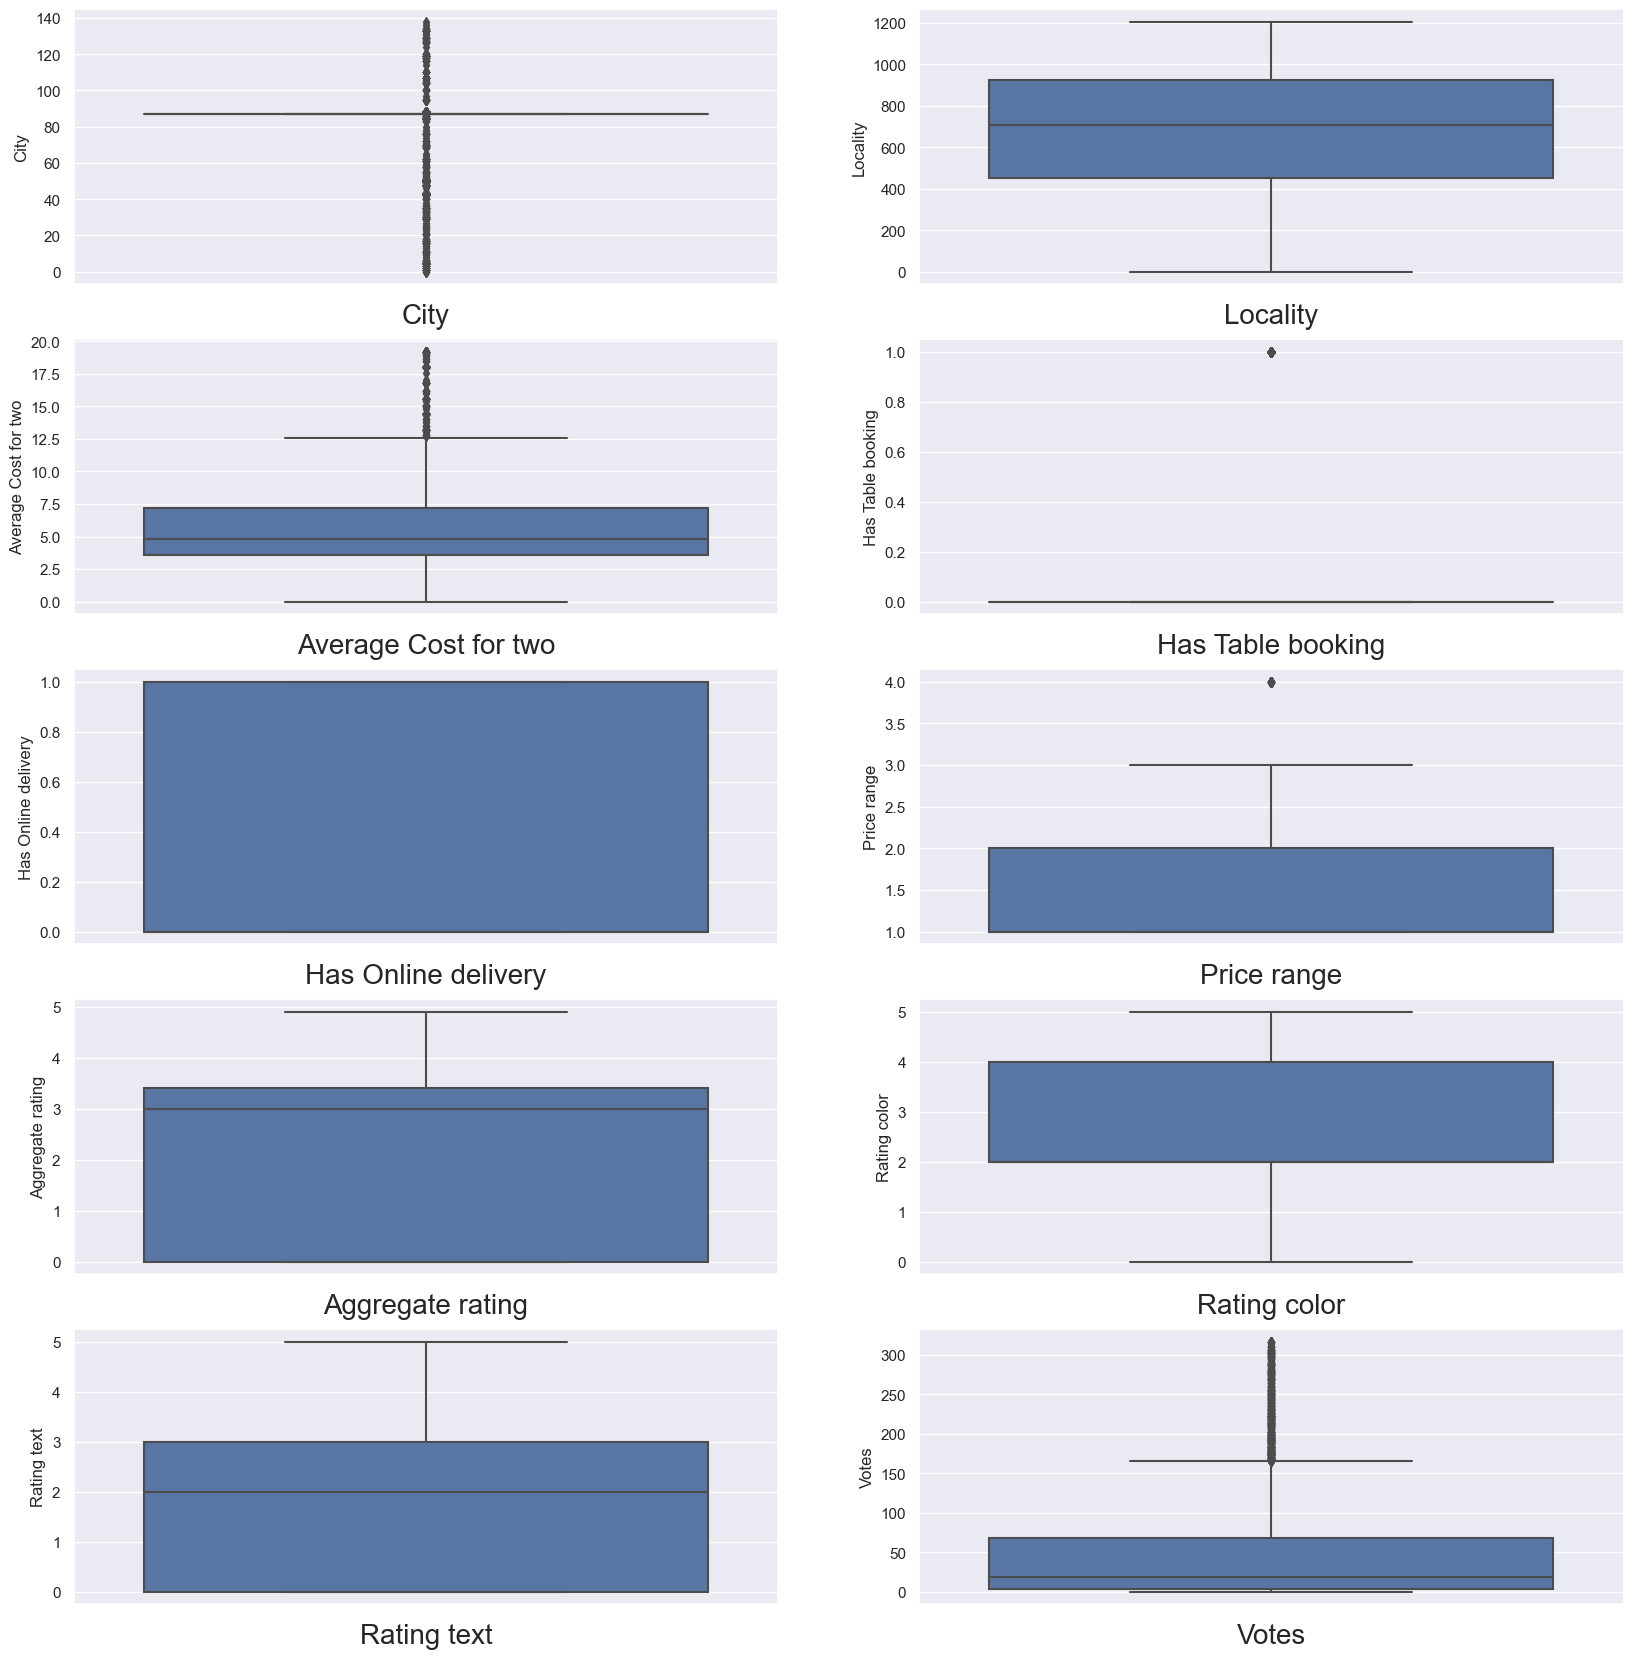

In [72]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data_copy.columns:
    if graph <= 12:
        plt.subplot(6, 2, graph)
        ax = sns.boxplot(y=data_copy[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.show()


### now data is better

In [73]:
data_copy.skew()

City                   -1.552248
Locality               -0.352897
Average Cost for two    1.349731
Has Table booking       3.305250
Has Online delivery     1.087549
Price range             0.954375
Aggregate rating       -0.771374
Rating color            0.162547
Rating text             0.410679
Votes                   1.847915
dtype: float64

In [74]:
data_copy['Votes'] = np.sqrt(data_copy['Votes'])
data_copy['Average Cost for two'] = np.sqrt(data_copy['Average Cost for two'])

In [75]:
data_copy.skew()

City                   -1.552248
Locality               -0.352897
Average Cost for two    0.500720
Has Table booking       3.305250
Has Online delivery     1.087549
Price range             0.954375
Aggregate rating       -0.771374
Rating color            0.162547
Rating text             0.410679
Votes                   0.794348
dtype: float64

### now data is batter

### Let's divide feature and label

In [76]:
x = data_copy.drop('Price range',axis = 1)
y = data_copy['Price range']

In [77]:
y.value_counts()

1    4317
2    2655
3     728
4      38
Name: Price range, dtype: int64

### data is balanced

In [78]:
### scaled features
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)

### Model bulding

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 786)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred_train = clf.predict(x_train)
        print("\n========================Train Result======================\n")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
        print('\nTrain Confusion Matrix:')
        print(confusion_matrix(y_train, y_pred_train))
        
    elif not train:
        y_pred_test = clf.predict(x_test)
        print("\n========================Test Result==========================")
        print(f"Accuracy Score: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")
        print('\nTest Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred_test))
        print('\nTest Classification Report:')
        print(classification_report(y_test, y_pred_test, digits=2))

### DecisionTreeClassifier

In [82]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True) 
metric_score(clf,x_train,x_test,y_train,y_test, train=False)    


========================Train Result======================

Accuracy Score: 100.00%

Train Confusion Matrix:
[[3235    0    0    0]
 [   0 1992    0    0]
 [   0    0  547    0]
 [   0    0    0   29]]

========================Test Result==========================
Accuracy Score: 98.14%

Test Confusion Matrix:
[[1079    2    1    0]
 [   1  650   11    1]
 [   2    5  166    8]
 [   0    1    4    4]]

Test Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1082
           2       0.99      0.98      0.98       663
           3       0.91      0.92      0.91       181
           4       0.31      0.44      0.36         9

    accuracy                           0.98      1935
   macro avg       0.80      0.83      0.81      1935
weighted avg       0.98      0.98      0.98      1935



### RandomForestClassifier

In [84]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
metric_score(rfc,x_train,x_test,y_train,y_test, train=True) 
metric_score(rfc,x_train,x_test,y_train,y_test, train=False) 


========================Train Result======================

Accuracy Score: 100.00%

Train Confusion Matrix:
[[3235    0    0    0]
 [   0 1992    0    0]
 [   0    0  547    0]
 [   0    0    0   29]]

========================Test Result==========================
Accuracy Score: 98.71%

Test Confusion Matrix:
[[1080    1    1    0]
 [   2  653    7    1]
 [   0    4  176    1]
 [   0    1    7    1]]

Test Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1082
           2       0.99      0.98      0.99       663
           3       0.92      0.97      0.95       181
           4       0.33      0.11      0.17         9

    accuracy                           0.99      1935
   macro avg       0.81      0.77      0.77      1935
weighted avg       0.99      0.99      0.99      1935



### Cross Validation

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
###### DecisionTreeClassifier
cross_val_scores = cross_val_score(clf, x,y, cv=10, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

Mean Cross-Validation Accuracy: 0.9179387667097888


In [88]:
######RandomForestClassifier
cross_val_scores = cross_val_score(rfc, x,y, cv=10, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

Mean Cross-Validation Accuracy: 0.9501124849992143


### DecisionTreeClassifier is giving better result so i will choose it

In [89]:
import pickle
pickle.dump(clf,open('Price range_______','wb'))

## For Average Cost for two

In [90]:
data_copy1 = data.copy(deep = True)

In [91]:
data_copy1 = data_copy1.drop(['Is delivering now','Cuisines'],axis=1)

In [92]:
data_copy1.columns

Index(['City', 'Locality', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [93]:
data.shape

(9542, 12)

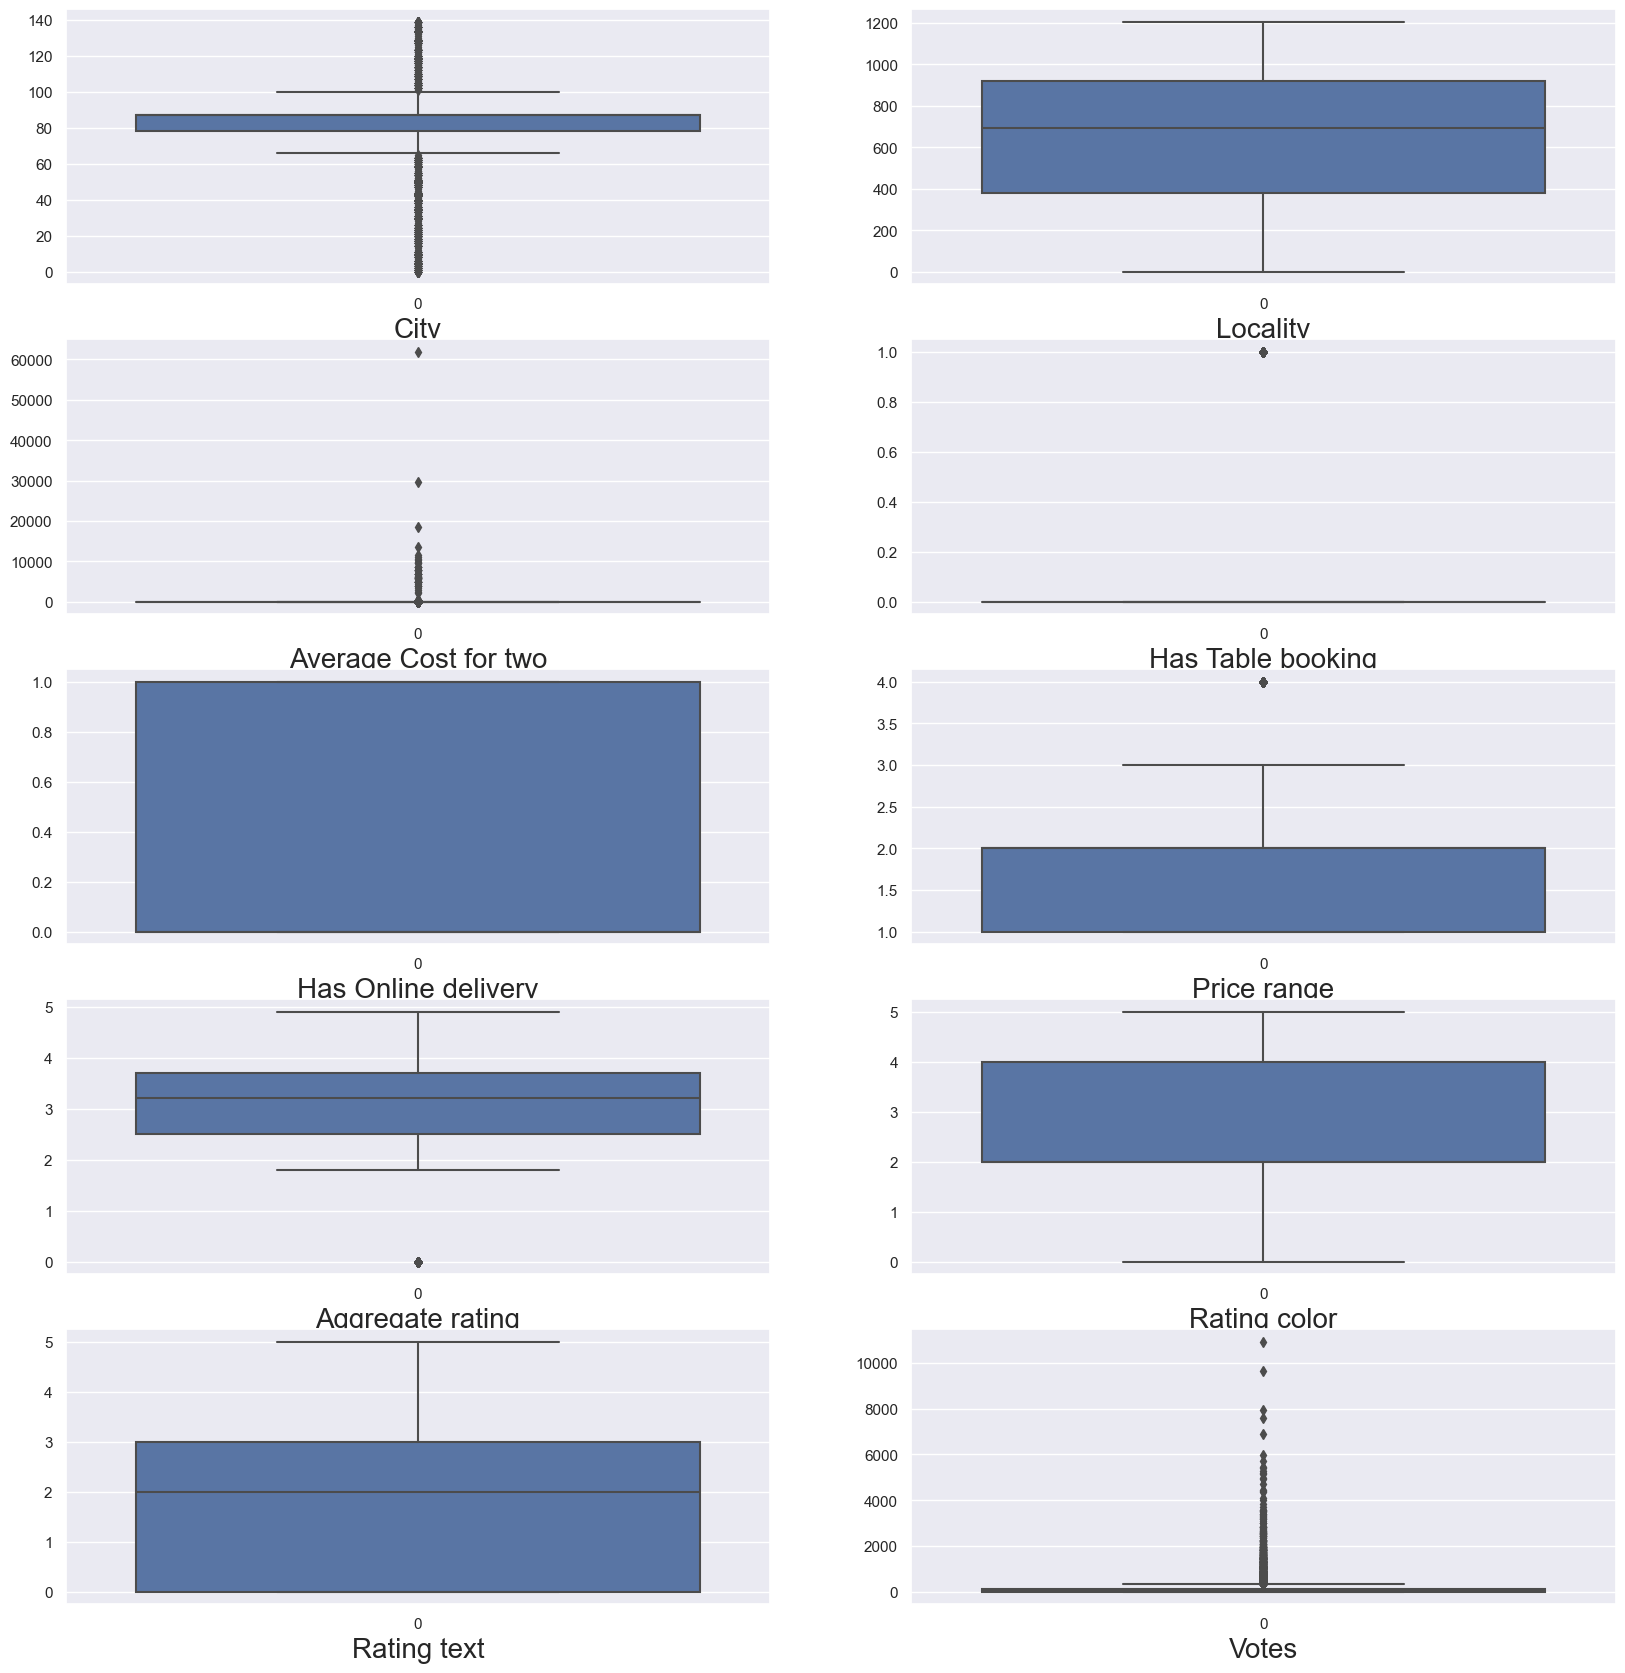

In [94]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data_copy1.columns:
    if graph <= 12:
        plt.subplot(6, 2, graph)
        ax = sns.boxplot(data=data_copy1[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1



plt.show()

In [95]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1

In [96]:
#### higher side outlier
v_high = (q3['Votes'] + (1.5* iqr['Votes']))
print(v_high)

v_index= np.where(data_copy1['Votes']> v_high) 
print (v_index)

data_copy1 = data_copy1.drop(data_copy1.index[v_index])
print (data_copy1.shape ) 

data_copy1.reset_index()

317.5
(array([   1,    3,    5, ..., 9539, 9540, 9541], dtype=int64),)
(8411, 10)


,index,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,73.0,171.0,79.20,1.0,0.0,3,4.8,0.0,1.0,314
1,2,75.0,308.0,288.00,1.0,0.0,4,4.4,1.0,5.0,270
2,4,75.0,860.0,108.00,1.0,0.0,4,4.8,0.0,1.0,229
3,12,106.0,1109.0,57.60,0.0,0.0,3,4.8,0.0,1.0,294
4,14,111.0,591.0,50.40,0.0,0.0,3,4.3,1.0,5.0,223
...,...,...,...,...,...,...,...,...,...,...,...
8406,9532,6.0,555.0,3.20,0.0,0.0,3,4.2,1.0,5.0,103
8407,9533,6.0,617.0,1.60,0.0,0.0,2,4.3,1.0,5.0,103
8408,9534,6.0,637.0,2.24,0.0,0.0,3,4.4,1.0,5.0,131
8409,9535,6.0,1205.0,2.24,0.0,0.0,3,4.2,1.0,5.0,152


In [97]:
data_copy1.skew()

City                    -1.289094
Locality                -0.319671
Average Cost for two    52.352841
Has Table booking        2.725837
Has Online delivery      1.186537
Price range              1.109950
Aggregate rating        -0.845775
Rating color             0.108794
Rating text              0.432606
Votes                    1.674184
dtype: float64

In [98]:
data_copy1['Votes'] = np.sqrt(data_copy1['Votes'])

In [99]:
data_copy1.skew()

City                    -1.289094
Locality                -0.319671
Average Cost for two    52.352841
Has Table booking        2.725837
Has Online delivery      1.186537
Price range              1.109950
Aggregate rating        -0.845775
Rating color             0.108794
Rating text              0.432606
Votes                    0.704775
dtype: float64

In [100]:
x1 = data_copy1.drop('Average Cost for two',axis = 1)
y1 = data_copy1['Average Cost for two']

In [101]:
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x1)

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y1, test_size= 0.24, random_state = 55)

In [104]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def metric_score1(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n============Train Result================")
        mae = mean_absolute_error(y_train, y_pred)
        mse = mean_squared_error(y_train, y_pred)
        r2 = r2_score(y_train, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)

    elif not train:
        y_pred = clf.predict(x_test)
        print("\n============Test Result================")
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)


### DecisionTreeRegressor

In [105]:
dtr1= DecisionTreeRegressor()
dtr1.fit(x_train, y_train)

DecisionTreeRegressor()

In [106]:
metric_score1(dtr1,x_train,x_test,y_train,y_test,train=True)        
metric_score1(dtr1,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  0.14964234652845418
Mean Squared Error :  0.18226501786132646
R-squared (R2) Score :  0.9999997959073268

============Test Result================
Mean Absolute Error :  11.148319450564747
Mean Squared Error :  92105.64442975401
R-squared (R2) Score :  -0.11974857570303565


## AdaBoostRegressor()

In [107]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [108]:
metric_score1(ada,x_train,x_test,y_train,y_test,train=True)        
metric_score1(ada,x_train,x_test,y_train, y_test,train=False)


============Train Result================
Mean Absolute Error :  449.77391702468407
Mean Squared Error :  832752.3958573838
R-squared (R2) Score :  0.06751901918663772

============Test Result================
Mean Absolute Error :  448.32504177721904
Mean Squared Error :  784240.2739077719
R-squared (R2) Score :  -8.534181484251208


In [109]:
### because average score for two is too much skew